In [1]:
!pip install networkx matplotlib numpy

Part 1: Small-World Networks (Watts–Strogatz Model)

Code: Create a Small-World Graph

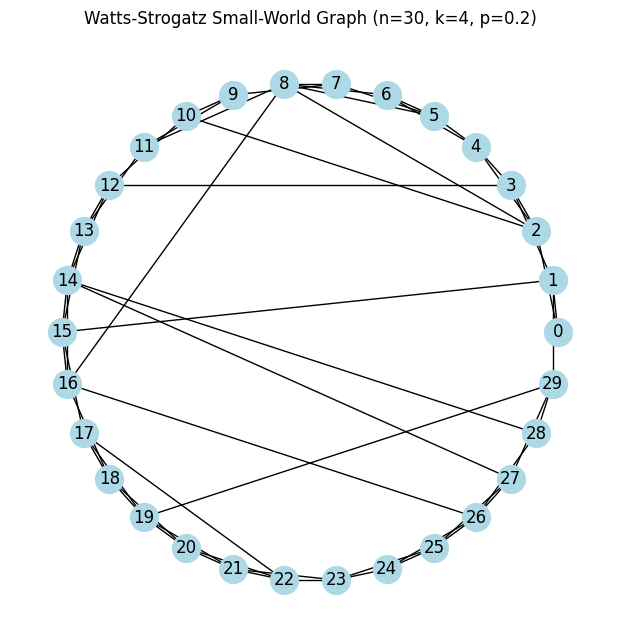

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Parameters: n nodes, each connected to k nearest neighbors in ring topology
# p is the rewiring probability
n = 30
k = 4
p = 0.2
G_sw = nx.watts_strogatz_graph(n=n, k=k, p=p)
# Draw the network
plt.figure(figsize=(6, 6))
nx.draw_circular(G_sw, node_size=400, with_labels=True, node_color='lightblue')
plt.title(f"Watts-Strogatz Small-World Graph (n={n}, k={k}, p={p})")
plt.show()

Analyze Small-World Properties

In [3]:
print("Average Clustering Coefficient:", nx.average_clustering(G_sw))
print("Average Shortest Path Length:", nx.average_shortest_path_length(G_sw))

Average Clustering Coefficient: 0.24111111111111114
Average Shortest Path Length: 2.845977011494253


Explore Different Rewiring Probabilities

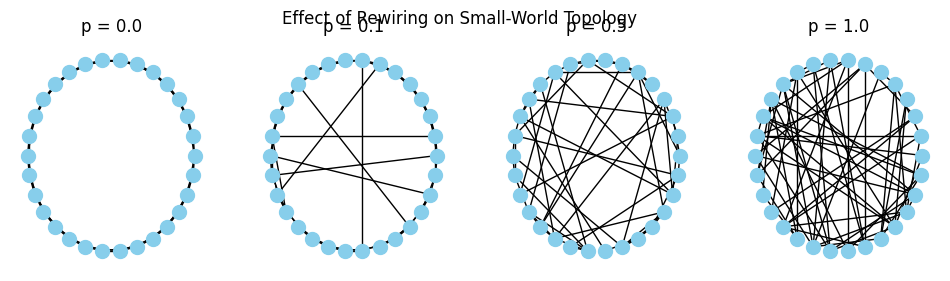

In [4]:
ps = [0.0, 0.1, 0.5, 1.0]
plt.figure(figsize=(12, 3))
for i, p in enumerate(ps):
 G = nx.watts_strogatz_graph(n=30, k=4, p=p)
 plt.subplot(1, 4, i+1)
 nx.draw_circular(G, node_size=100, with_labels=False, node_color='skyblue')
 plt.title(f"p = {p}")
plt.suptitle("Effect of Rewiring on Small-World Topology")
plt.show()

Part 2: Scale-Free Networks (Barabási–Albert Model)

Code: Create a Scale-Free Graph

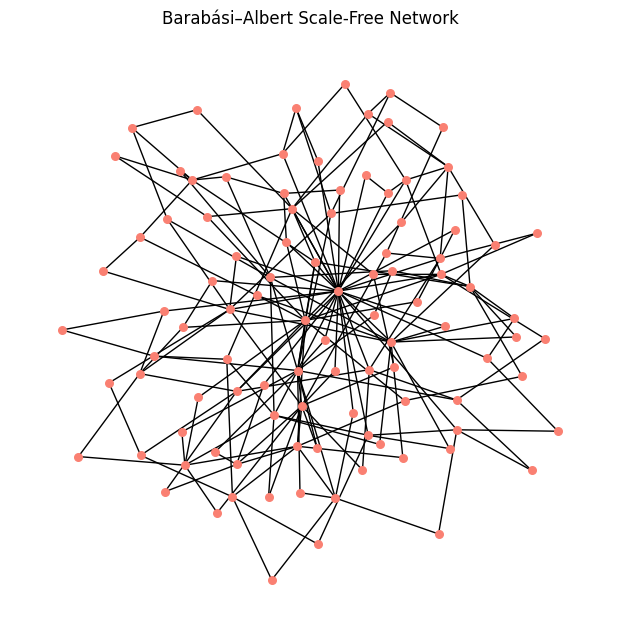

In [5]:
# Create a Barabási–Albert scale-free graph
n = 100 # total number of nodes
m = 2 # new edges per node
G_sf = nx.barabasi_albert_graph(n=n, m=m)
# Draw the network
plt.figure(figsize=(6, 6))
nx.draw(G_sf, node_size=30, with_labels=False, node_color='salmon')
plt.title("Barabási–Albert Scale-Free Network")
plt.show()

Degree Distribution

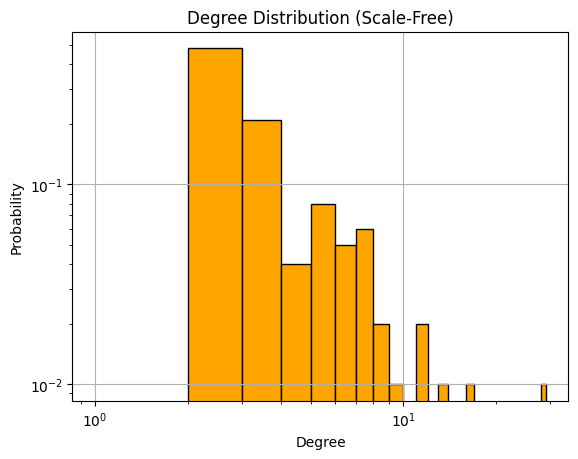

In [6]:
degrees = [d for n, d in G_sf.degree()]
plt.hist(degrees, bins=range(1, max(degrees)+1), edgecolor='black', color='orange',
density=True)
plt.title("Degree Distribution (Scale-Free)")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

Compare Network Statistics

def describe(G):
 return {
 "Nodes": G.number_of_nodes(),
 "Edges": G.number_of_edges(),
 "Avg Degree": np.mean([d for n, d in G.degree()]),
 "Avg Clustering": nx.average_clustering(G),
 "Avg Path Length": nx.average_shortest_path_length(G)
 }
print("Small-World Graph Stats:", describe(G_sw))
print("Scale-Free Graph Stats:", describe(G_sf))

Tutorial 3

In [8]:
! pip install networkx matplotlib numpy python-louvain cdlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.7 MB/s eta 0:00:00


 Modularity :  0.5577677122769064


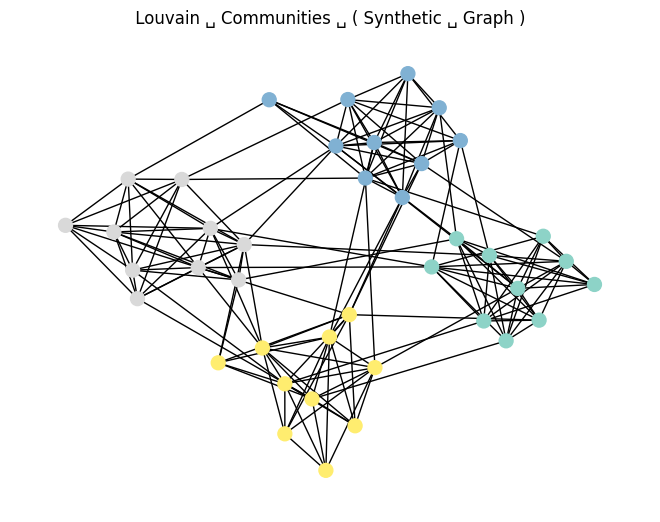

In [9]:
import networkx as nx
import community as community_louvain
import matplotlib . pyplot as plt
G = nx . planted_partition_graph (4 , 10 , 0.8 , 0.05 , seed =42)
partition = community_louvain . best_partition ( G )
modularity = community_louvain . modularity ( partition , G )
3
print ( " Modularity : " , modularity )
colors = [ partition [ n ] for n in G . nodes () ]
pos = nx . spring_layout (G , seed =42)
nx . draw (G , pos , node_color = colors , cmap = plt . cm . Set3 , with_labels = False , node_size =100)
plt . title ( " Louvain ␣ Communities ␣ ( Synthetic ␣ Graph ) " )
plt . show ()

Spectral Clustering with Scikit-learn

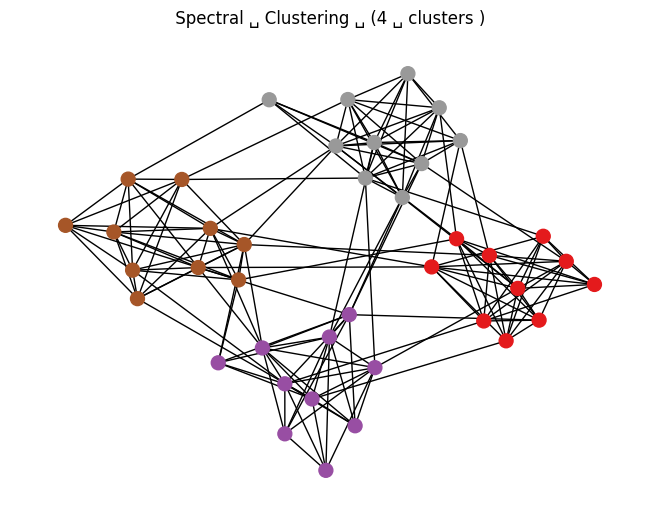

In [19]:
from sklearn . cluster import KMeans
from scipy . sparse . linalg import eigsh
import numpy as np
# Adjacency and Laplacian
A = nx . adjacency_matrix ( G ) . astype ( float )
D = np . diag ([ d for _ , d in G . degree () ])
L = D - A . toarray ()
# Eigen decomposition
eigval , eigvec = eigsh (L , k =4 , which = 'SM')
kmeans = KMeans ( n_clusters =4 , n_init =100) . fit ( eigvec )
labels = kmeans . labels_
nx . draw (G , pos , node_color = labels , cmap = plt . cm . Set1 , node_size =100)
plt . title ( " Spectral ␣ Clustering ␣ (4 ␣ clusters ) " )
plt . show ()

Dynamic Graph with Changing Communities

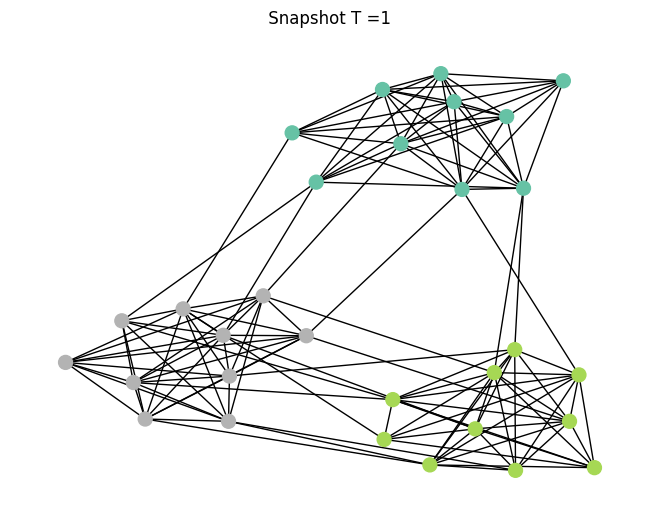

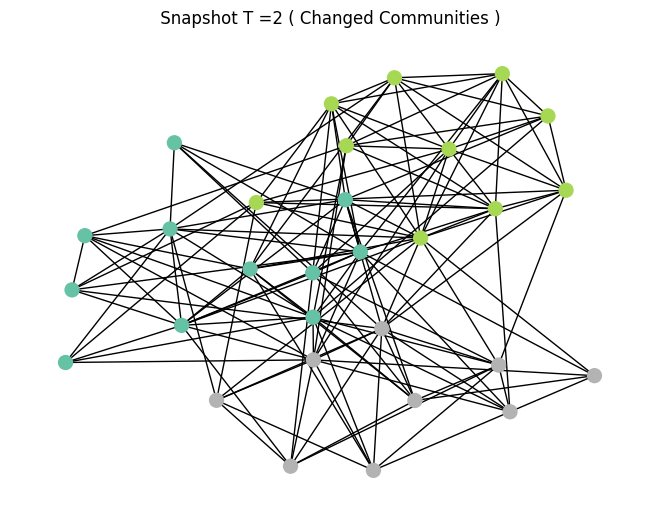

In [35]:
import copy
G1 = nx.planted_partition_graph(3 , 10 , 0.8 , 0.05 , seed =1)
G2 = nx.planted_partition_graph(3 , 10 , 0.6 , 0.15 , seed =2)
part1 = community_louvain.best_partition(G1)
part2 = community_louvain.best_partition(G2)
# Visualize both snapshots
def plot (G , part , title ) :
  colors = [part[n] for n in G.nodes()]
  pos = nx.spring_layout (G , seed =42)
  nx.draw(G , pos , node_color = colors , node_size =100 , cmap = plt.cm.Set2 )
  plt.title(title)
  plt.show()
plot( G1 , part1 , " Snapshot T =1 " )
plot( G2 , part2 , " Snapshot T =2 ( Changed Communities ) " )